In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
995,2020-07-15,United Kingdom,291107.0,291373.0,44915.0,44968.0,-266.0,-53.0
996,2020-07-15,Germany,199235.0,199726.0,9074.0,9071.0,-491.0,3.0
997,2020-07-15,Iran,262964.0,262173.0,13200.0,13211.0,791.0,-11.0
998,2020-07-15,Turkey,214966.0,214993.0,5400.0,5402.0,-27.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2959.626
RMSE =  7423.651307544018


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  300.194
RMSE =  696.3141704719214


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15166.082474226803
RMSE =  19958.000519647954
-- World performances for deaths --
MAE =  1556.8453608247423
RMSE =  1892.5836320024835


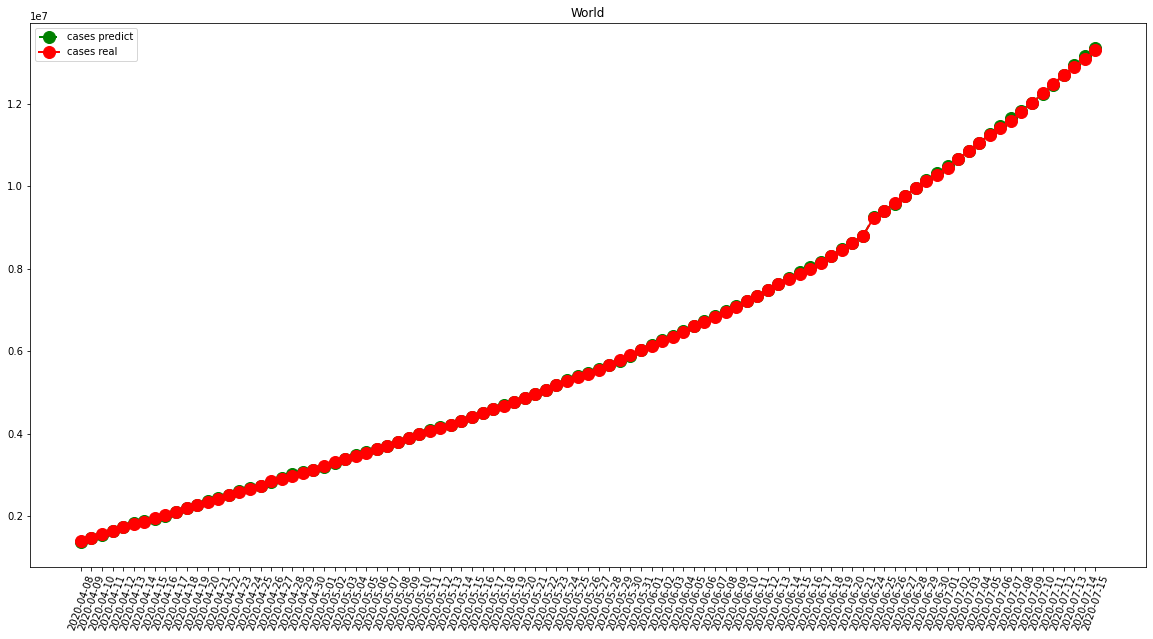

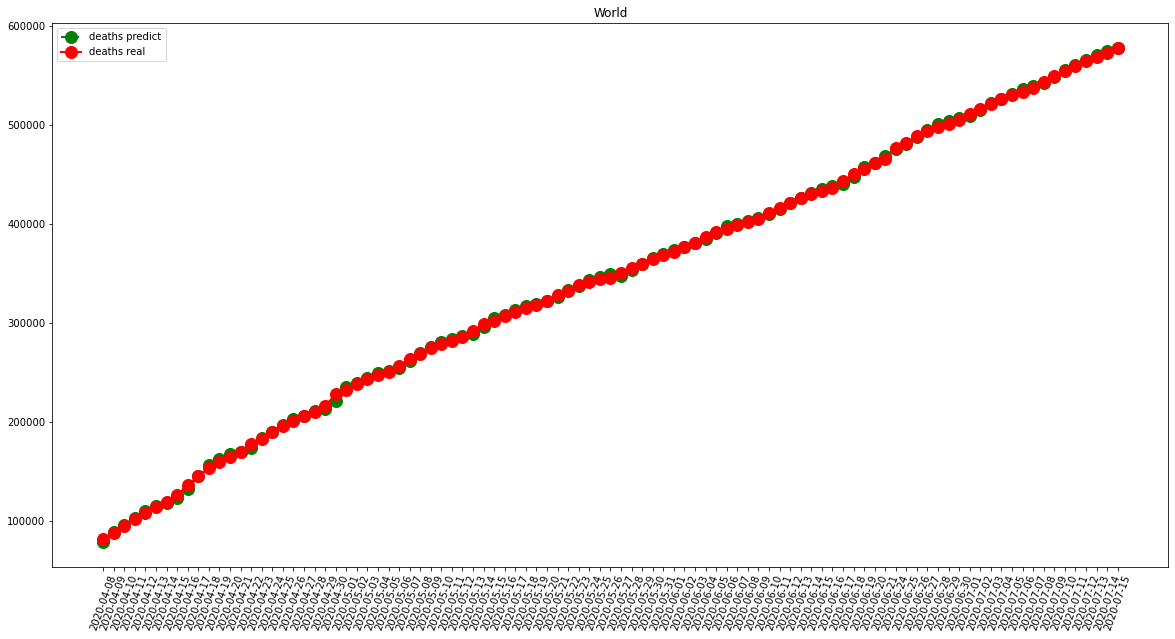

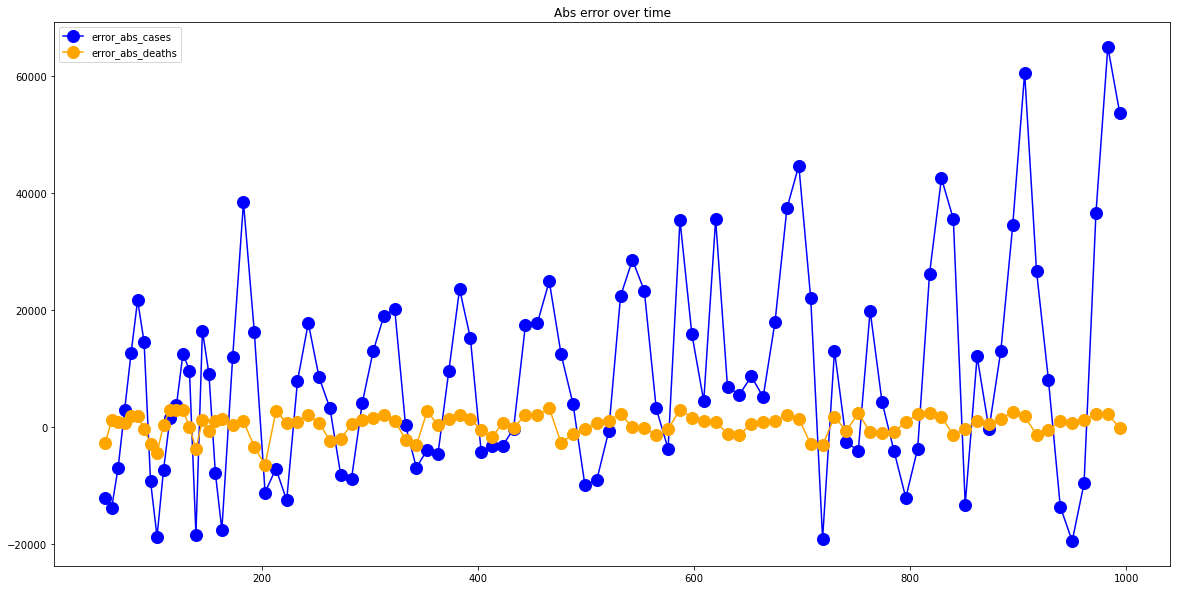

In [7]:
visShow("World")

-- France performances for cases --
MAE =  855.0467289719626
RMSE =  1411.579045561799
-- France performances for deaths --
MAE =  165.80373831775702
RMSE =  323.8316309961781


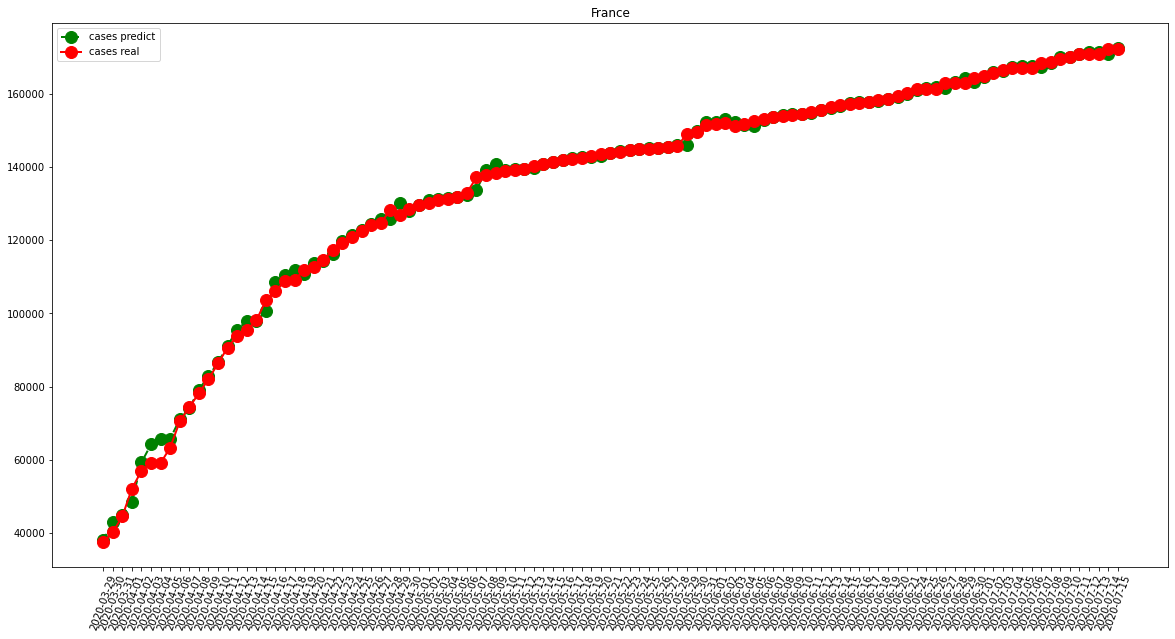

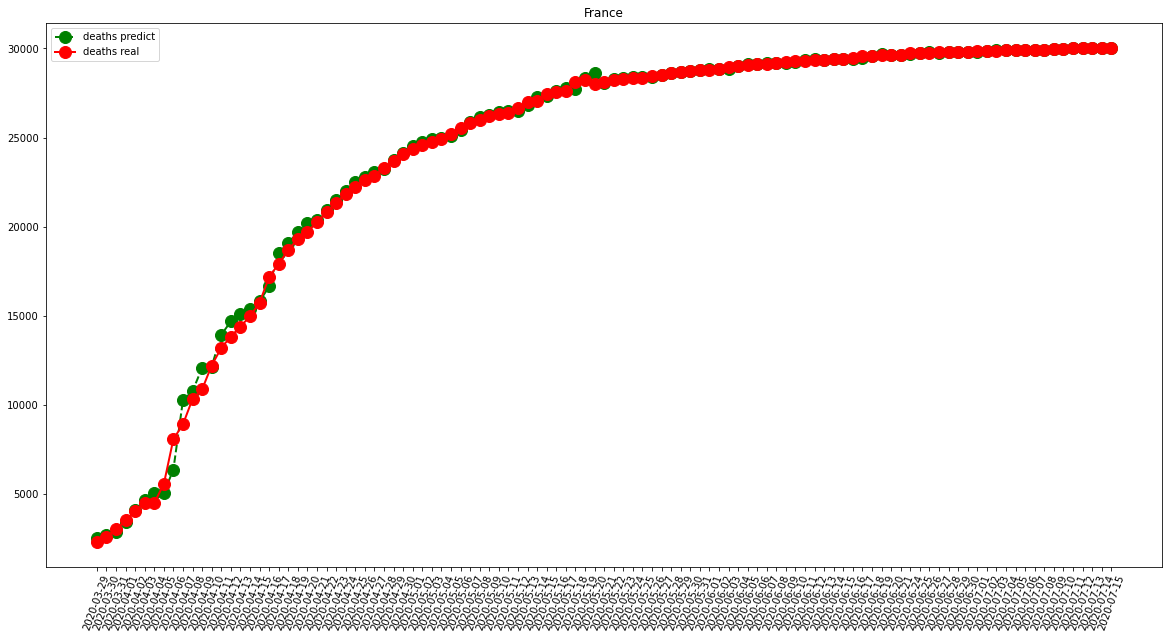

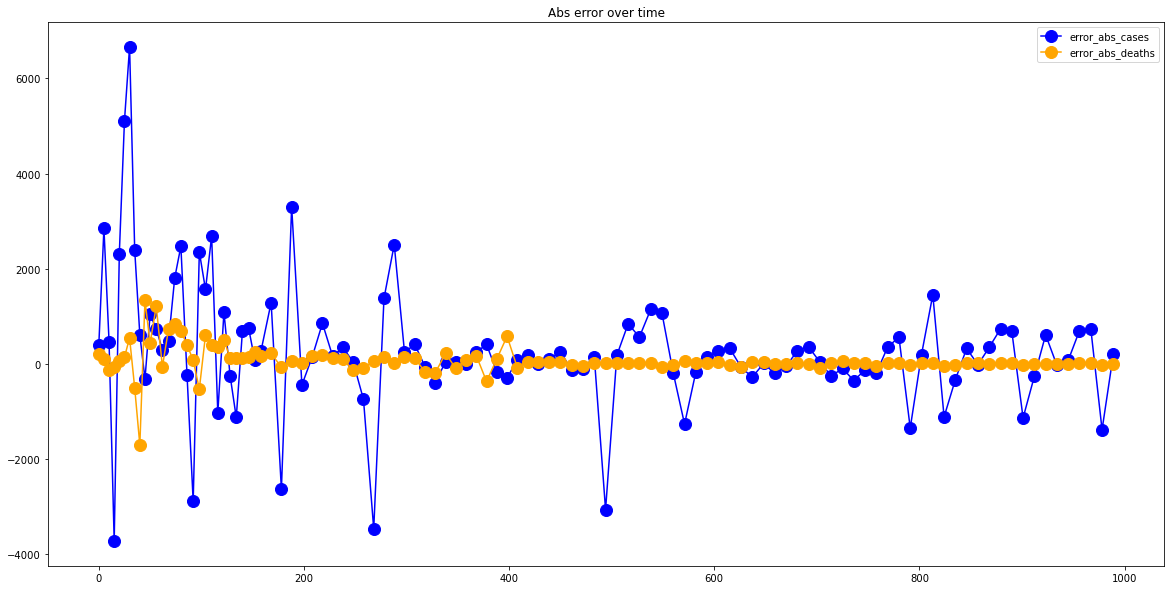

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  356.9906542056075
RMSE =  525.8868966207308
-- Italy performances for deaths --
MAE =  92.70093457943925
RMSE =  285.97089911420517


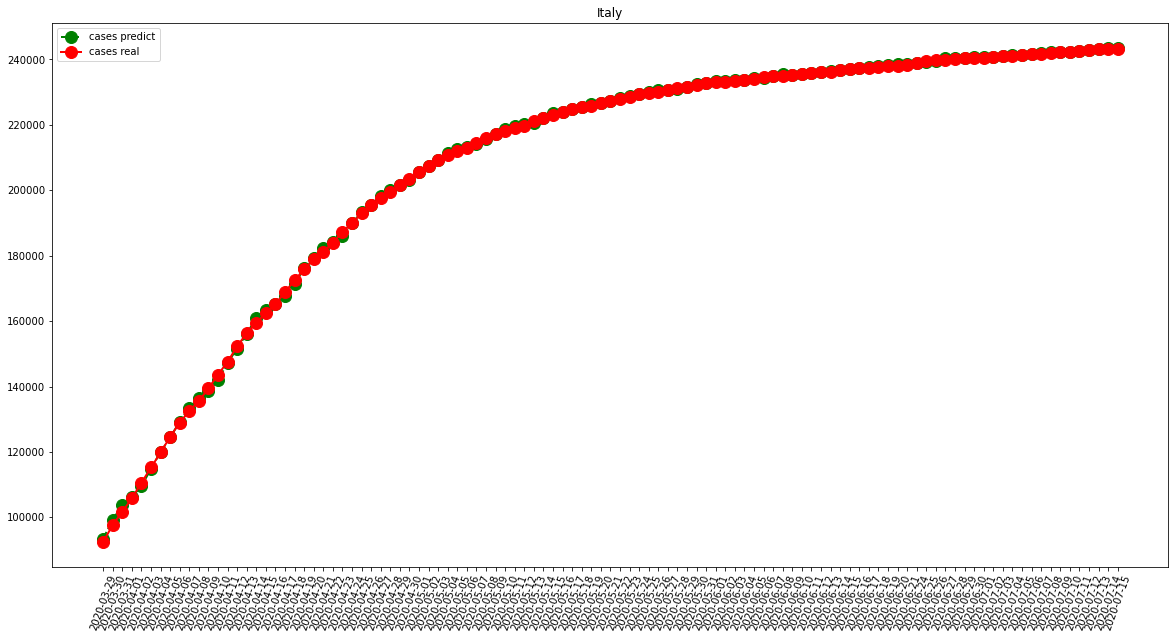

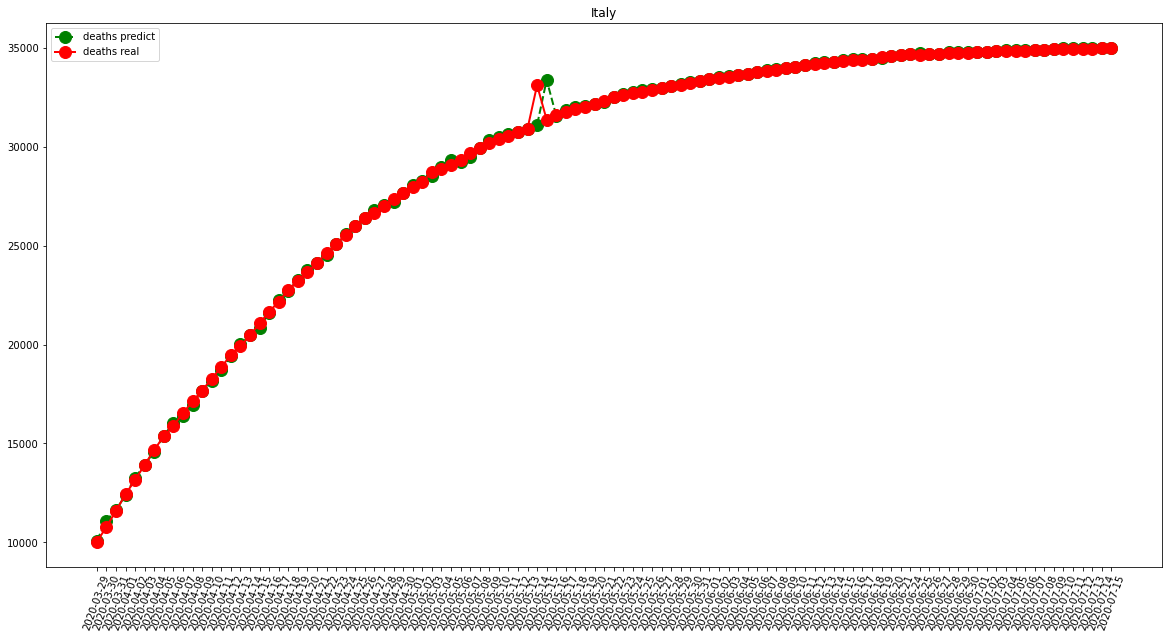

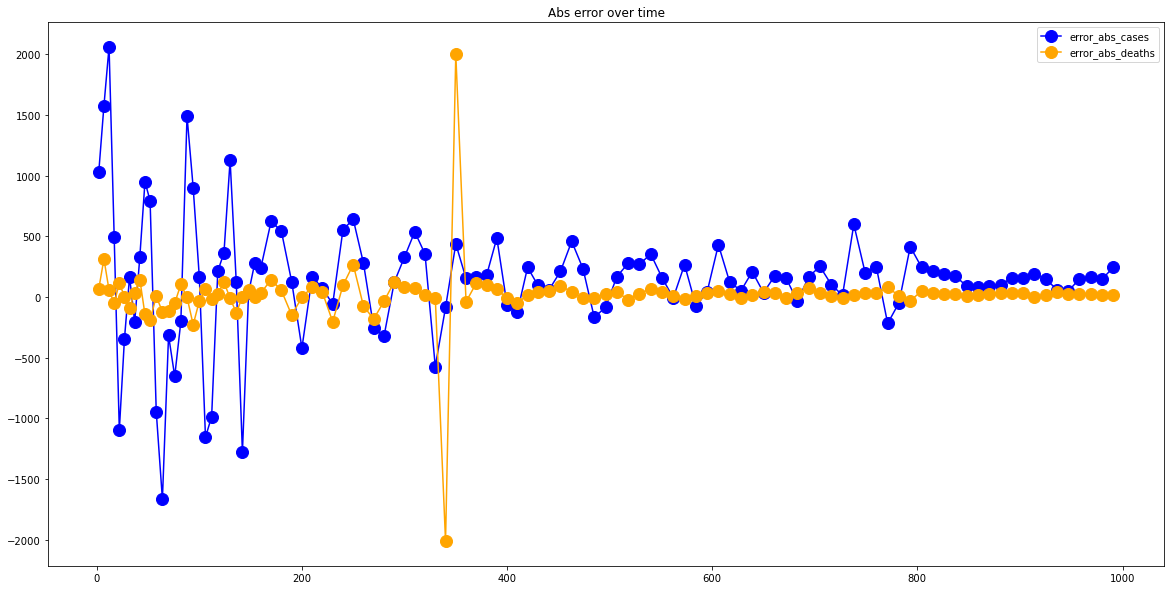

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  846.9252336448598
RMSE =  1994.3844926876304
-- Spain performances for deaths --
MAE =  170.4018691588785
RMSE =  392.3970071432162


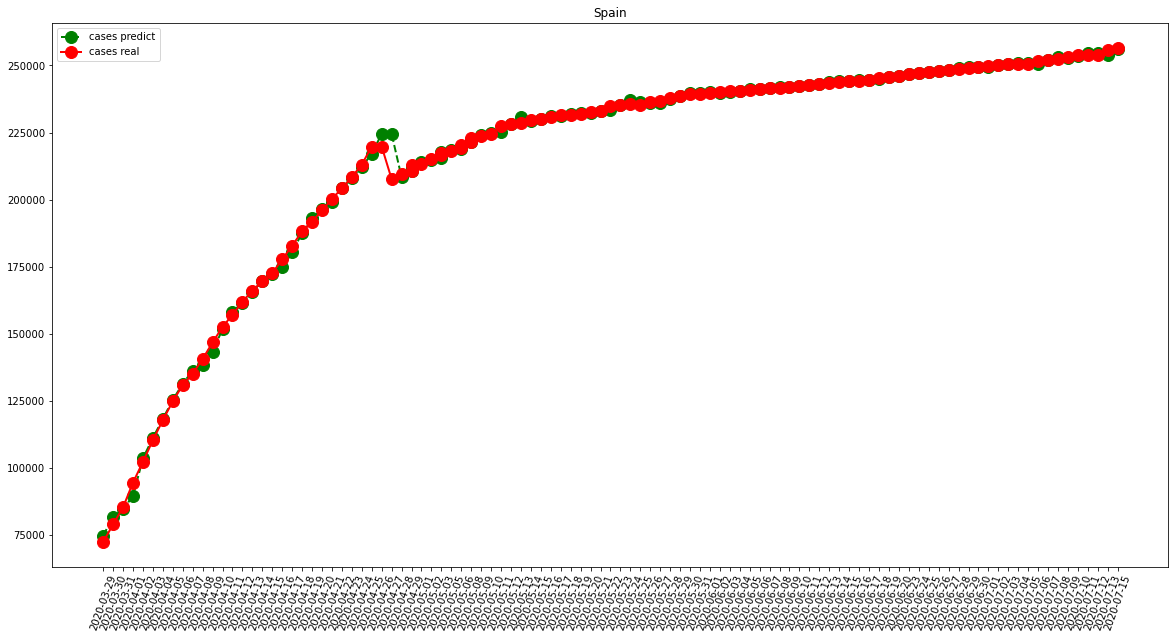

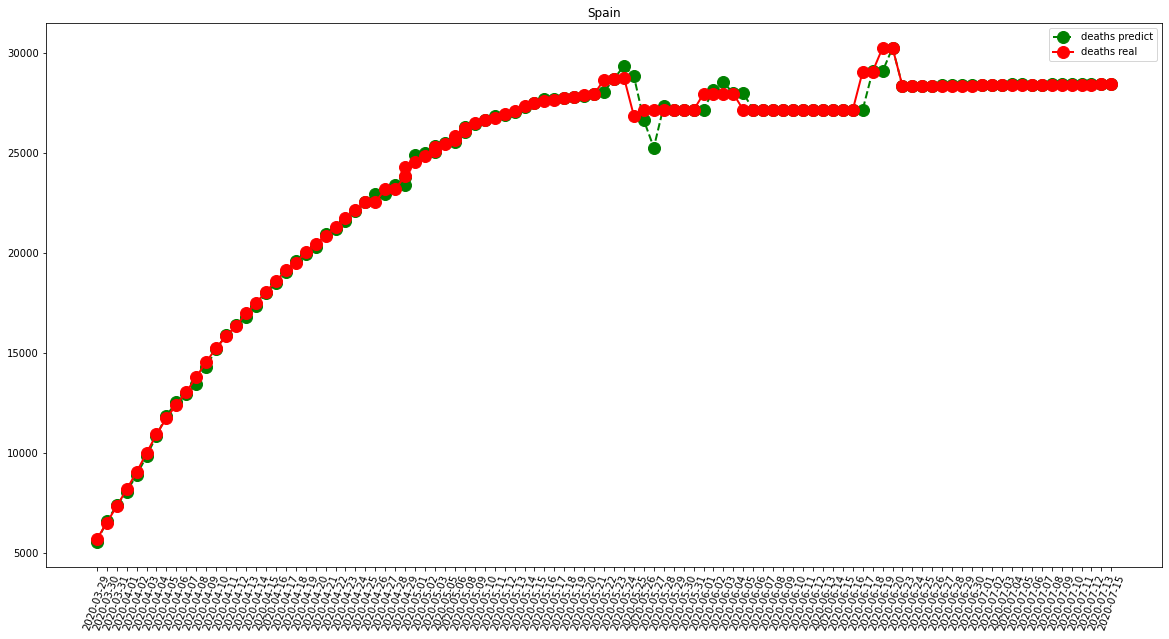

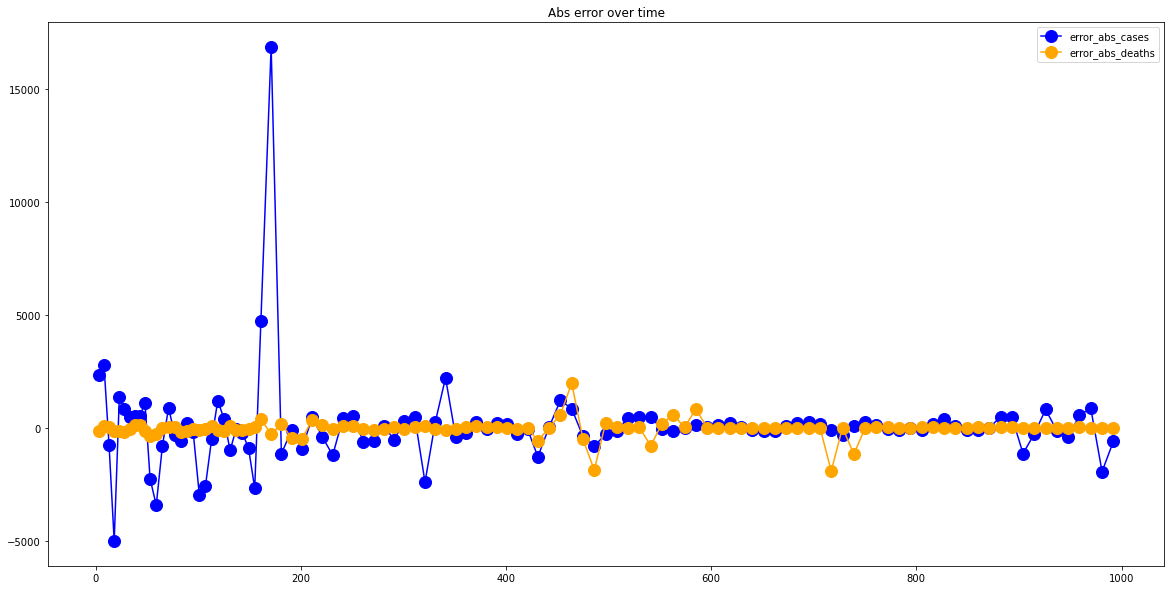

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5239.261682242991
RMSE =  7113.003688125694
-- United States performances for deaths --
MAE =  523.588785046729
RMSE =  761.2982025928001


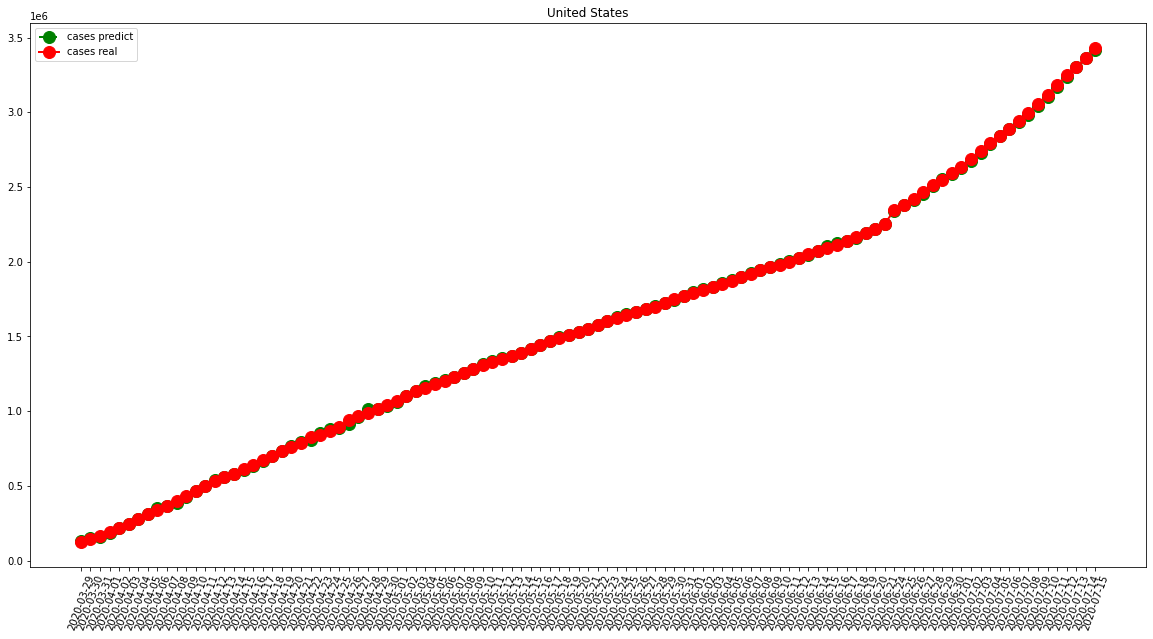

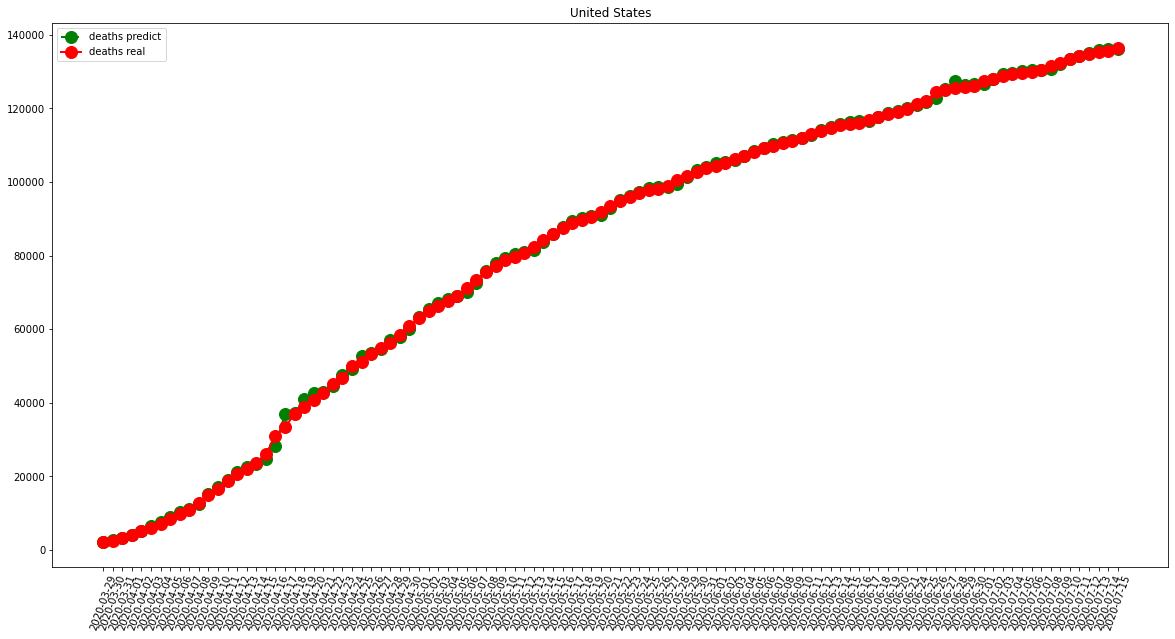

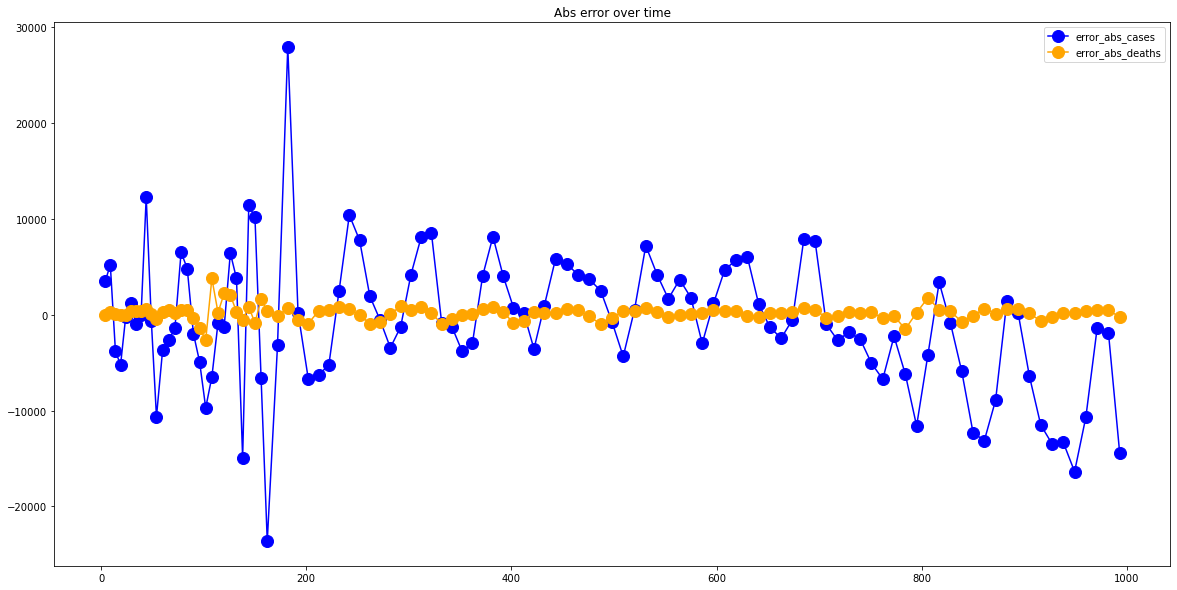

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  84.6355140186916
RMSE =  114.06917068574917
-- China performances for deaths --
MAE =  36.495327102803735
RMSE =  151.747422956147


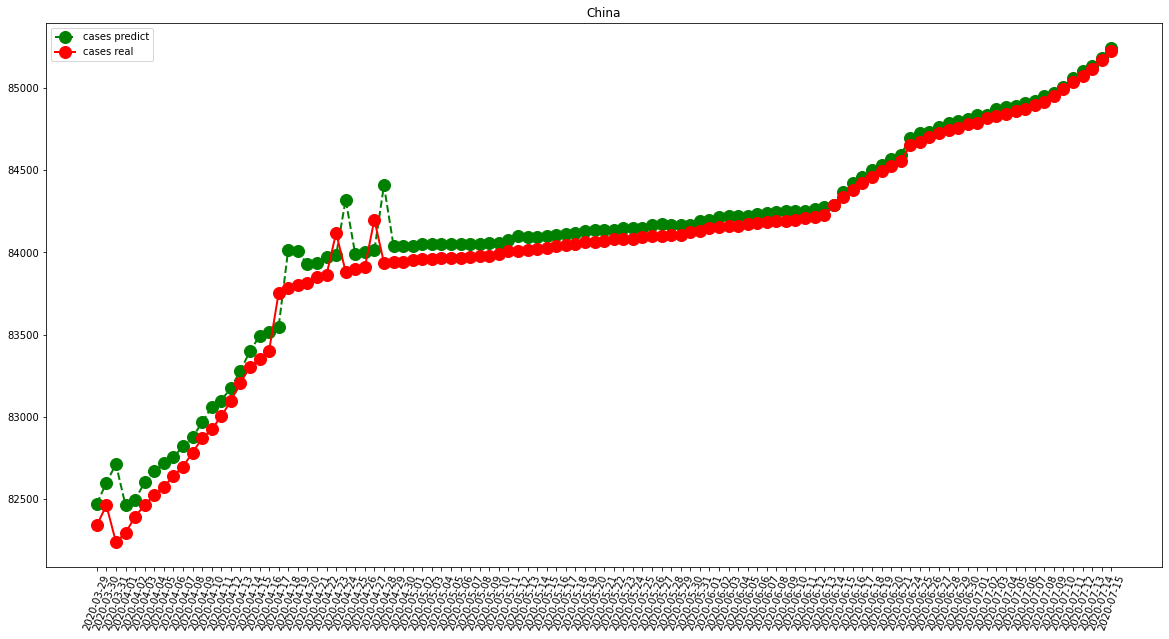

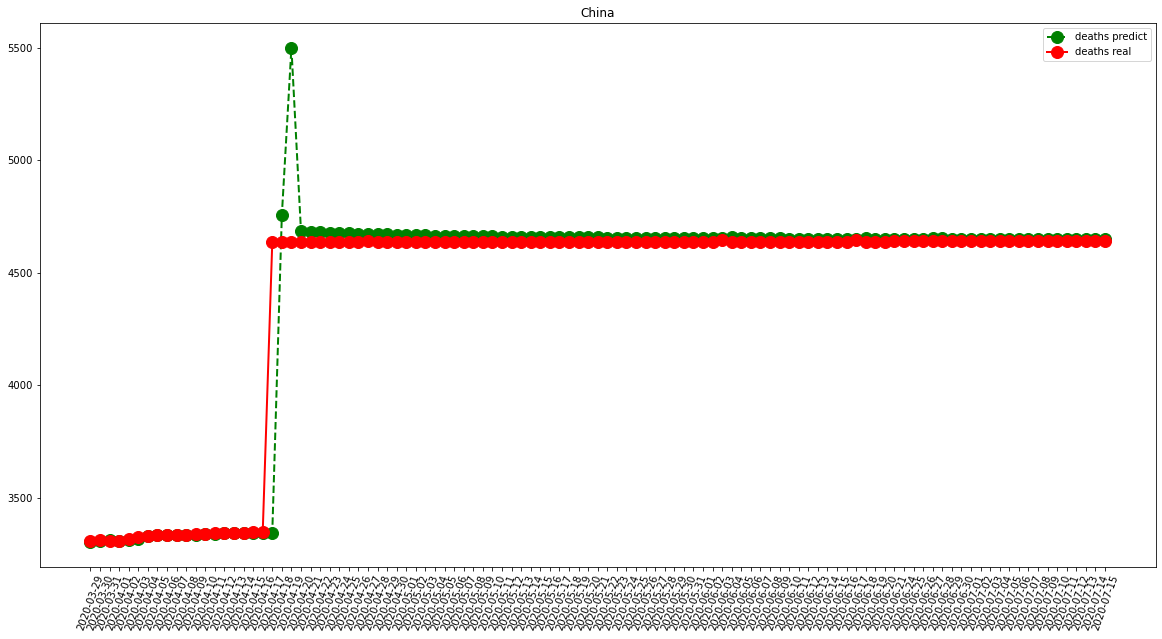

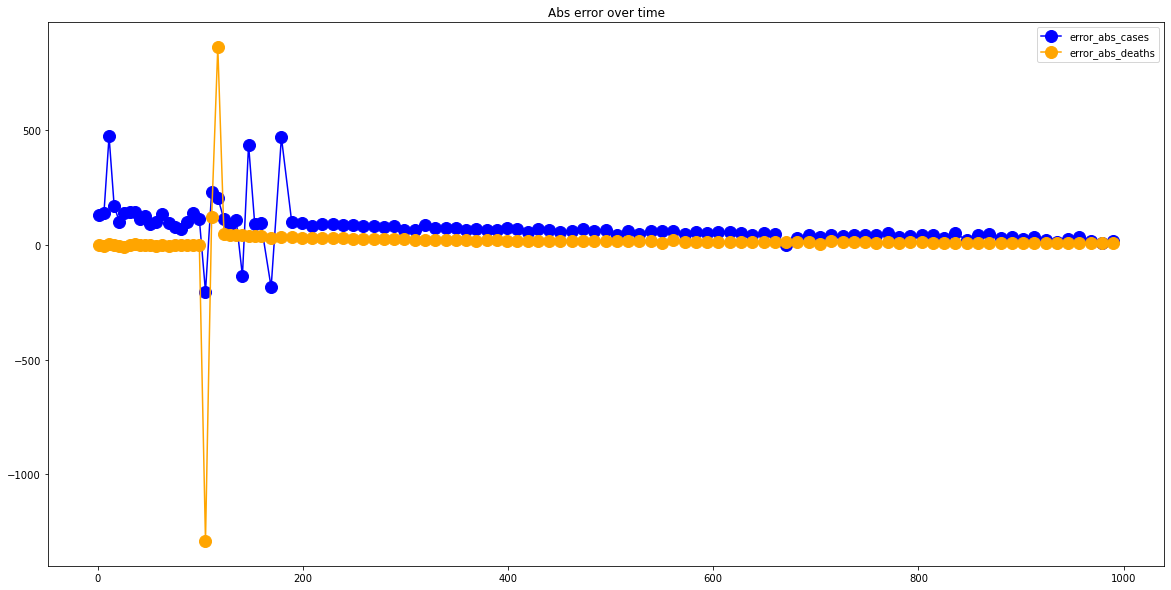

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1484.5569620253164
RMSE =  4692.790252550222
-- United Kingdom performances for deaths --
MAE =  229.69620253164558
RMSE =  551.0619896669486


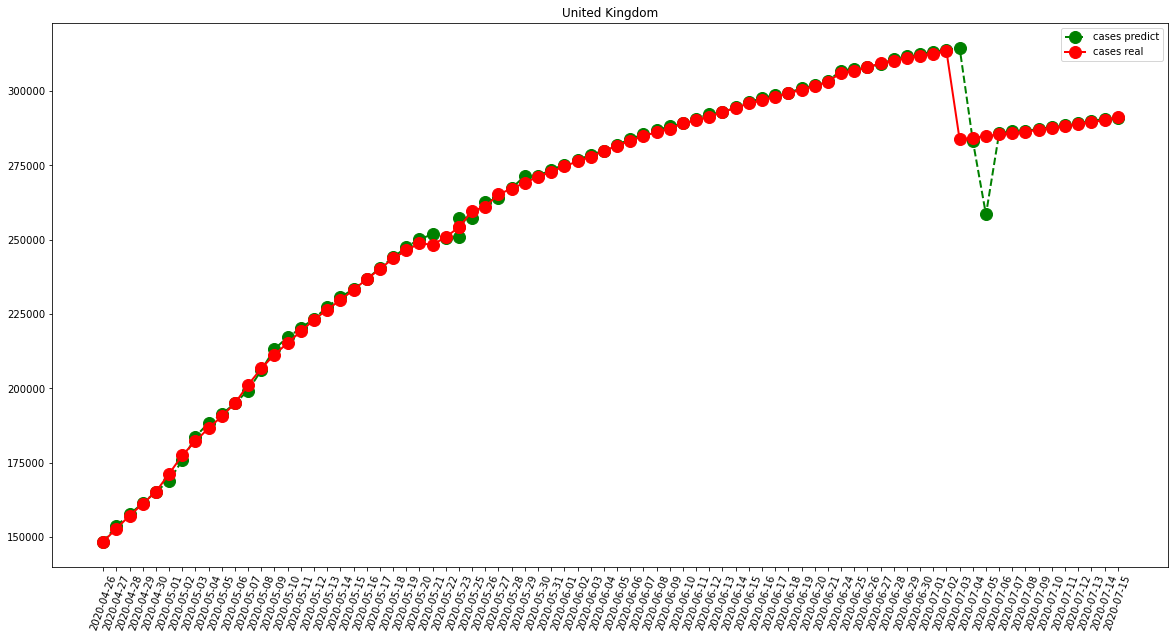

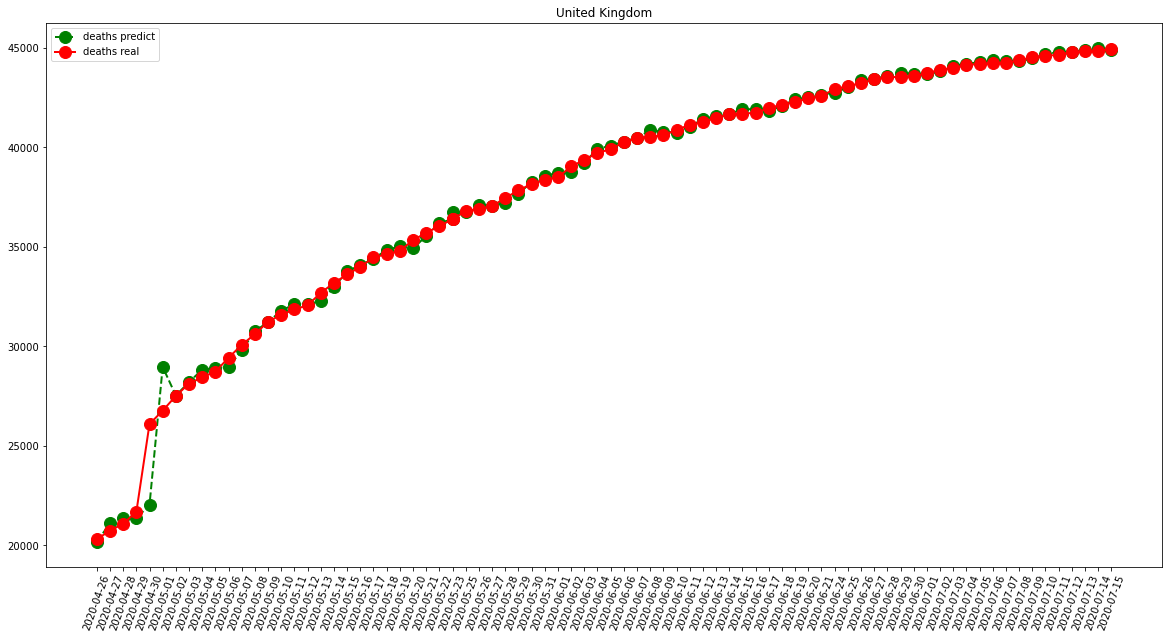

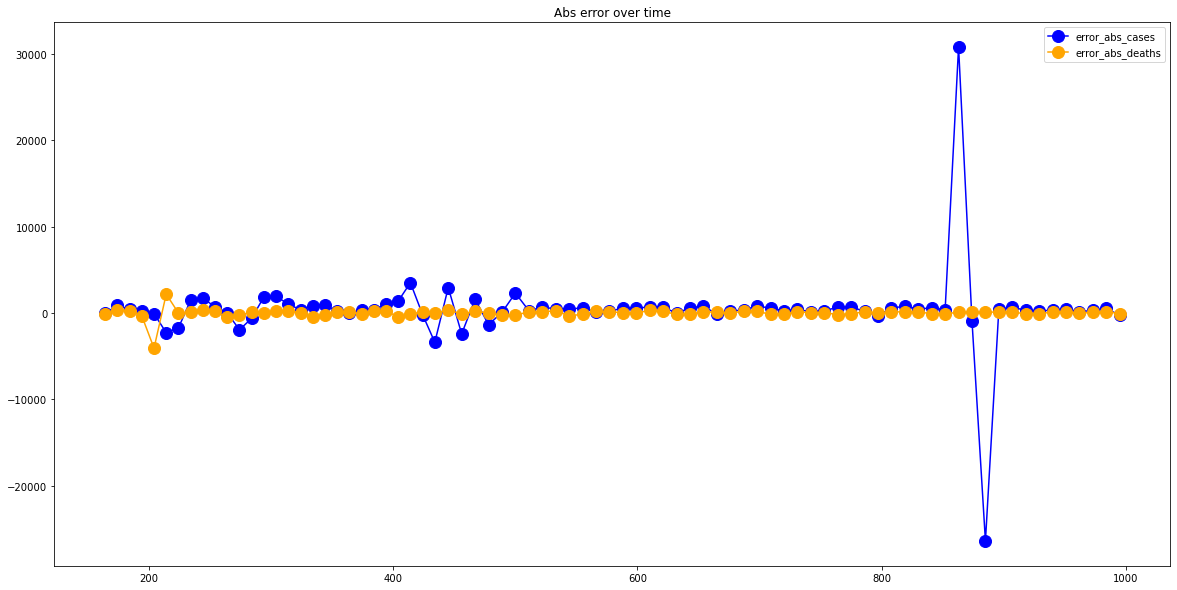

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  300.1392405063291
RMSE =  424.36345480278095
-- Germany performances for deaths --
MAE =  29.10126582278481
RMSE =  49.02711727042598


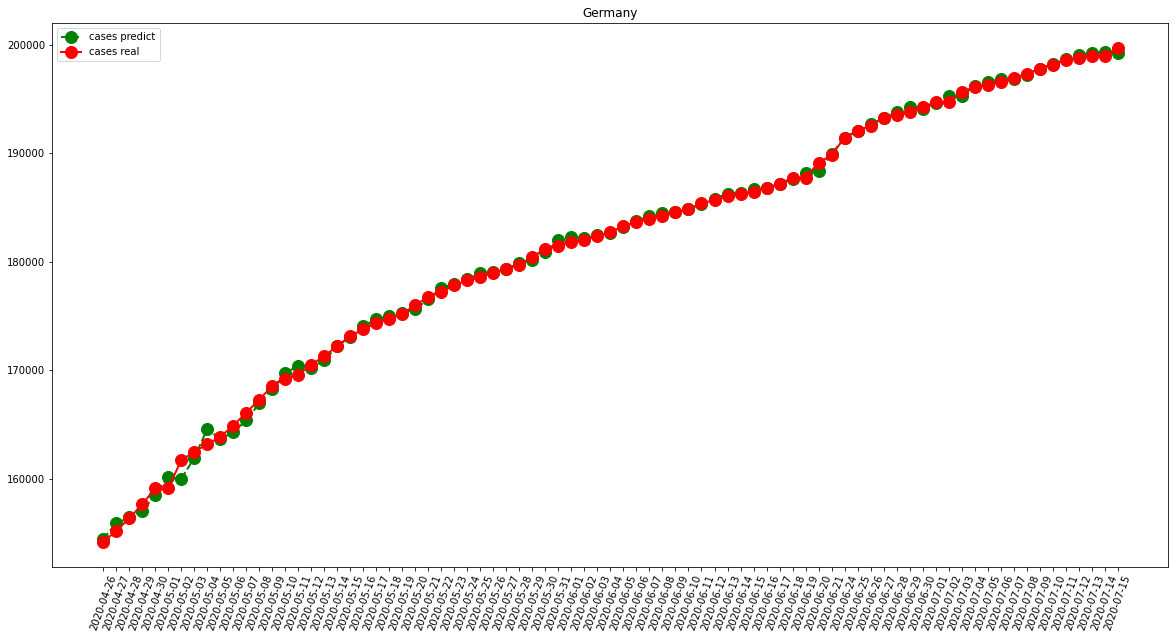

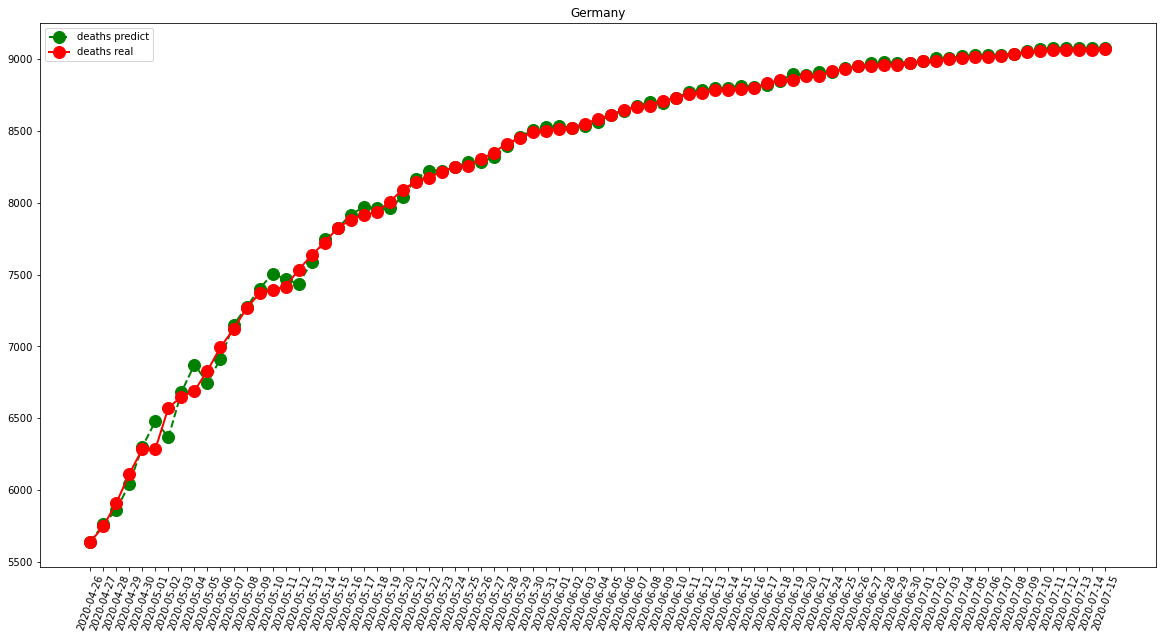

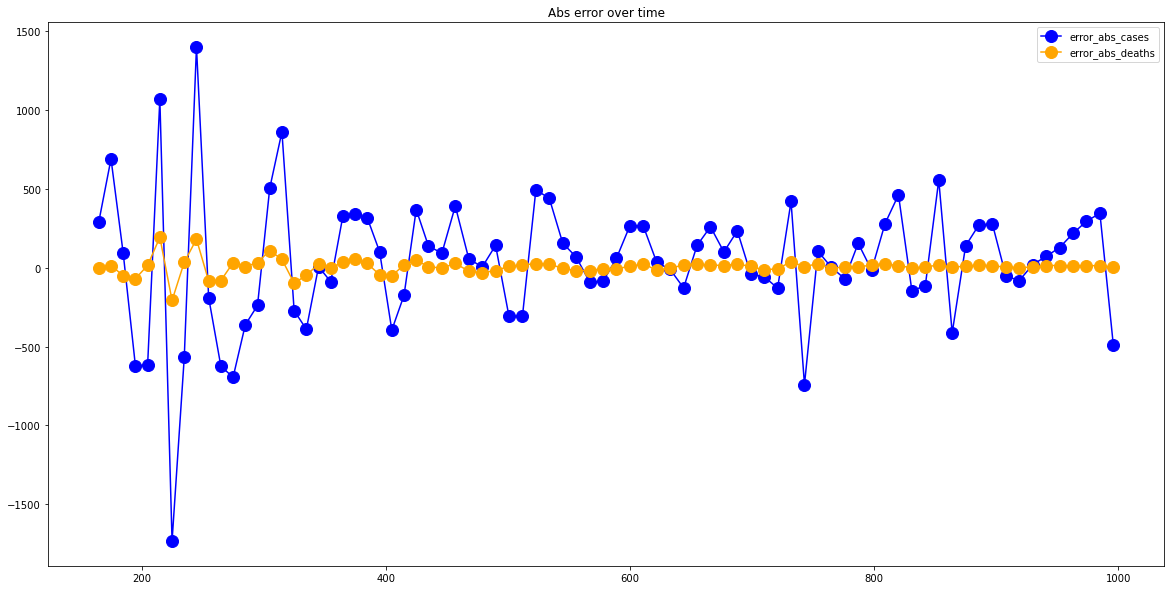

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  357.75949367088606
RMSE =  465.246974020727
-- Iran performances for deaths --
MAE =  18.936708860759495
RMSE =  29.81419252552997


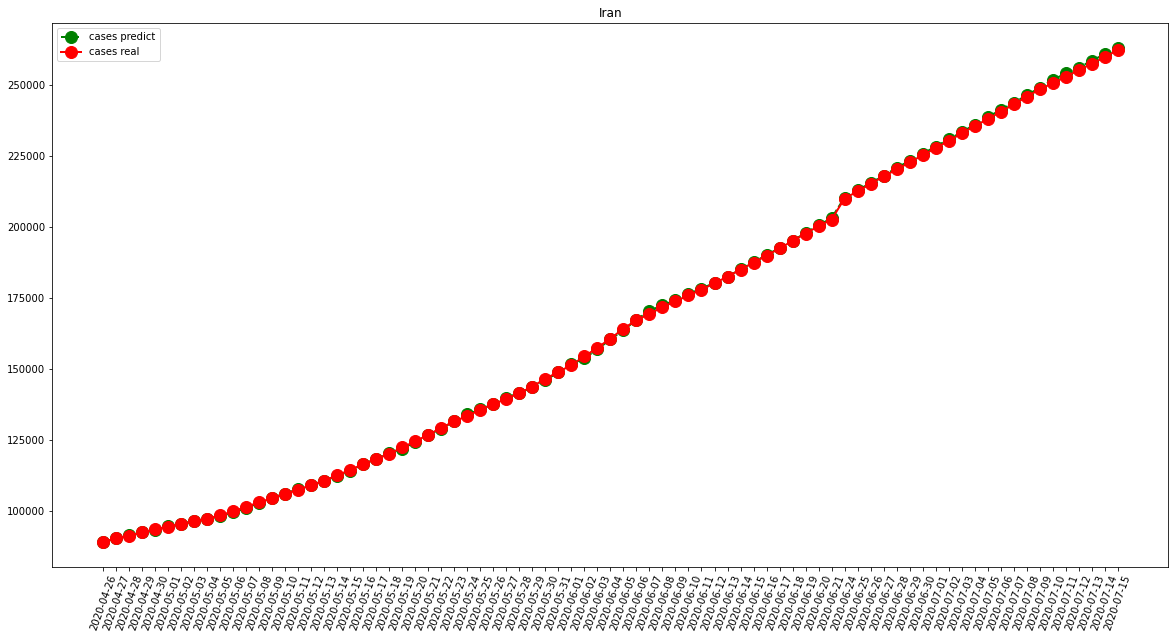

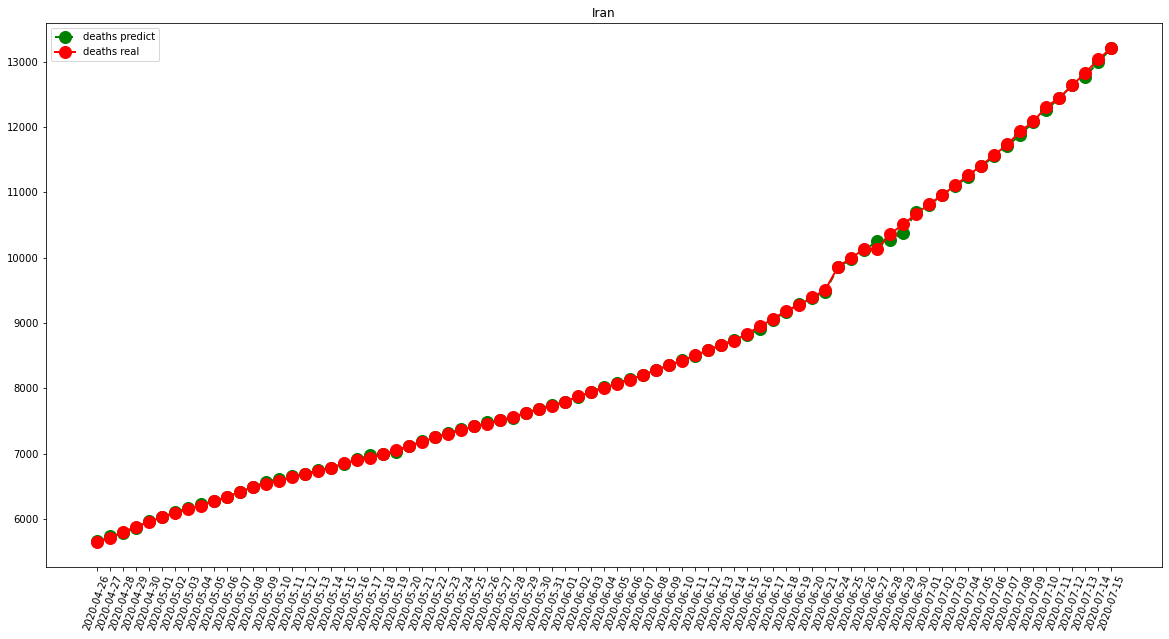

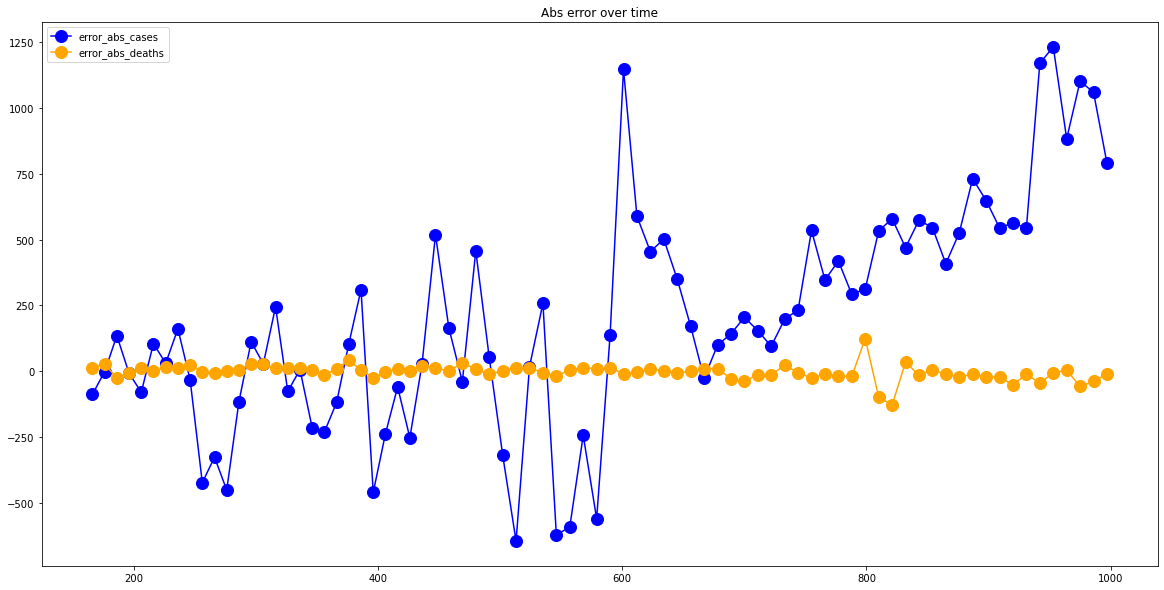

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  238.60759493670886
RMSE =  386.4335795352224
-- Turkey performances for deaths --
MAE =  23.50632911392405
RMSE =  114.20285083674797


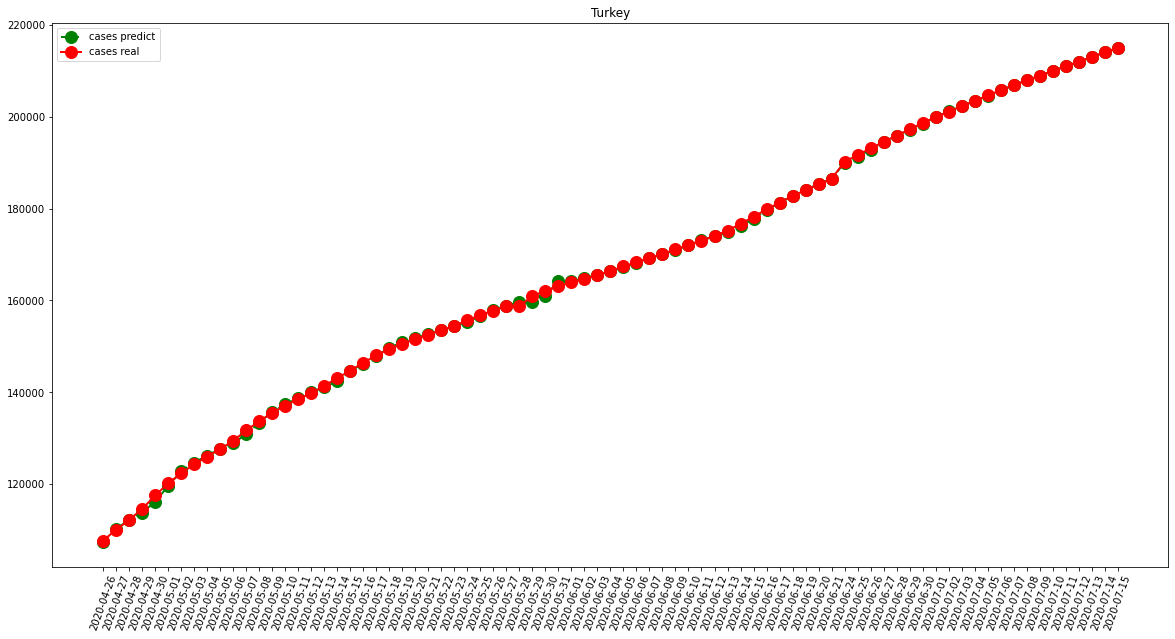

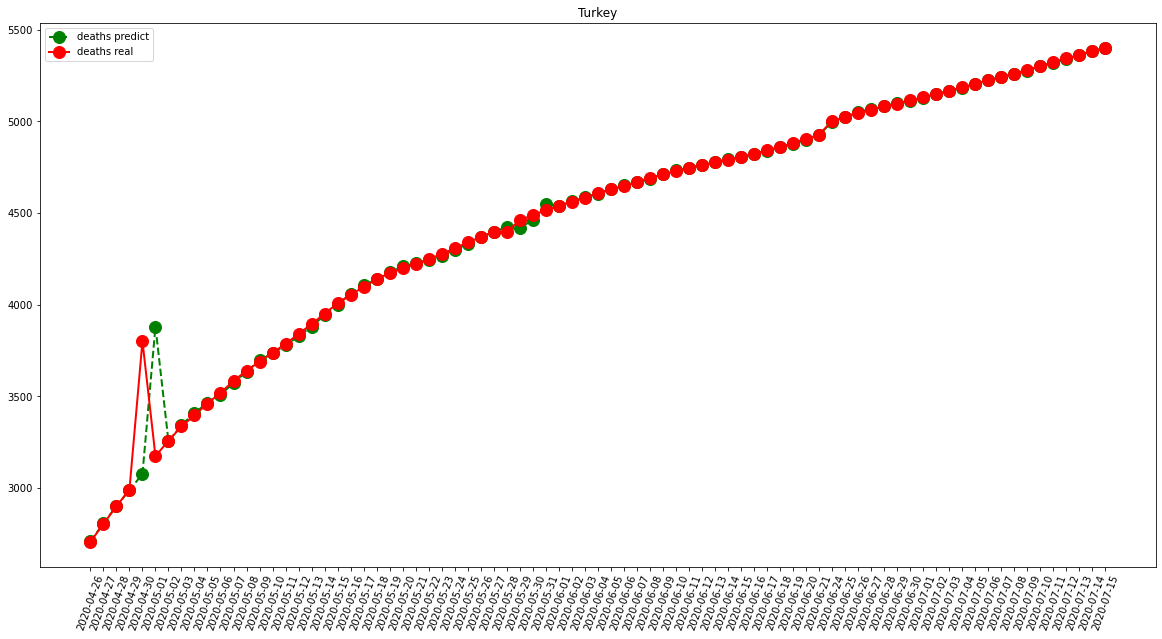

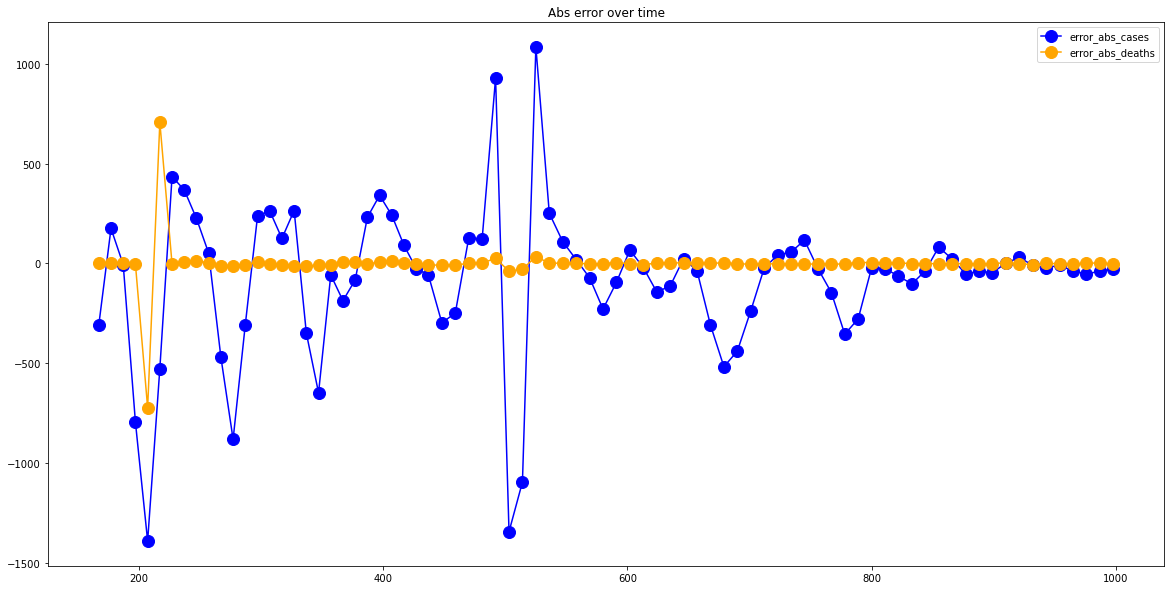

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9816.26923076923
RMSE =  12865.479014371396
-- Brazil performances for deaths --
MAE =  376.15384615384613
RMSE =  464.22959339599987


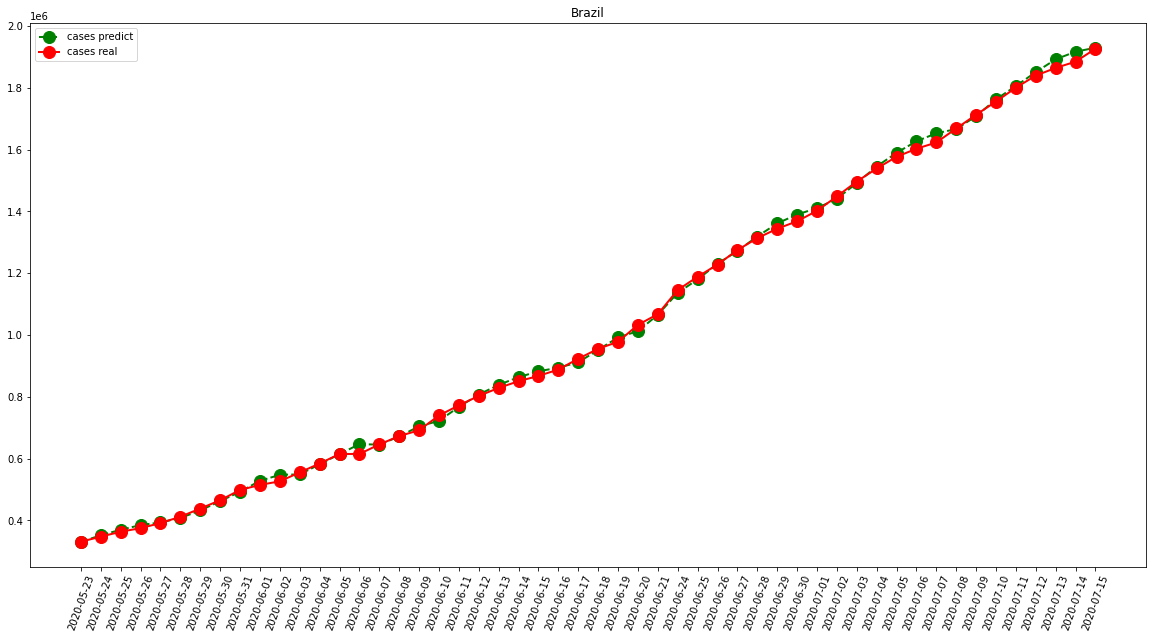

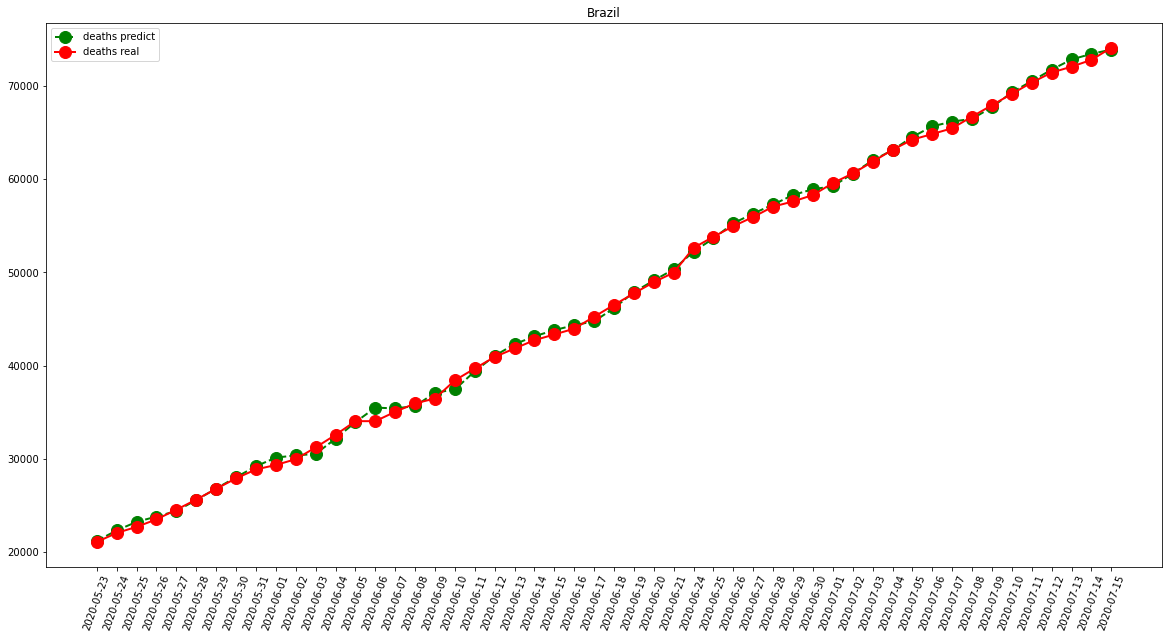

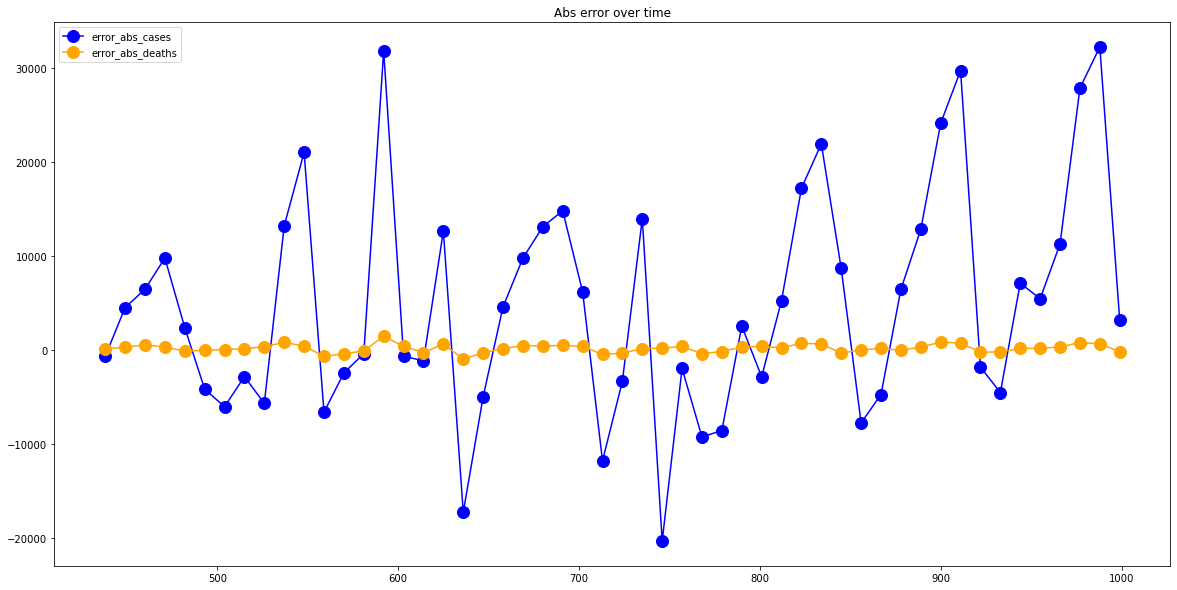

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)